In [1]:
#Kenny Zhu
#Jonathan Xu
#UCSD  Cogs9 Spring 2017

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


DATA_FILE= '../input/uber-raw-data-sep14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()
    


# Any results you write to the current directory are saved as output.

Uber-Jan-Feb-FOIL.csv
other-American_B01362.csv
other-Carmel_B00256.csv
other-Dial7_B00887.csv
other-Diplo_B01196.csv
other-FHV-services_jan-aug-2015.csv
other-Federal_02216.csv
other-Firstclass_B01536.csv
other-Highclass_B01717.csv
other-Lyft_B02510.csv
other-Prestige_B01338.csv
other-Skyline_B00111.csv
uber-raw-data-apr14.csv
uber-raw-data-aug14.csv
uber-raw-data-janjune-15.csv
uber-raw-data-jul14.csv
uber-raw-data-jun14.csv
uber-raw-data-may14.csv
uber-raw-data-sep14.csv



,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [2]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
uber_data['MinOfDay'] = uber_data['Date/Time'].dt.minute
uber_data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,MinOfDay
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,1,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,1,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday,1,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday,1,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday,1,0,11


In [3]:
weekday = uber_data.pivot_table(index=['DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
weekday.head()


DayOfWeek
Friday      160380
Monday      137288
Saturday    162057
Sunday      116532
Thursday    153276
Name: Base, dtype: int64

In [4]:
weekdayAverage= weekday/30
weekdayAverage.head()

DayOfWeek
Friday      5346.000000
Monday      4576.266667
Saturday    5401.900000
Sunday      3884.400000
Thursday    5109.200000
Name: Base, dtype: float64

NameError: name 'plt' is not defined

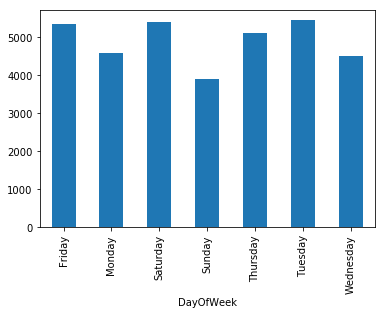

In [5]:
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')

NameError: name 'plt' is not defined

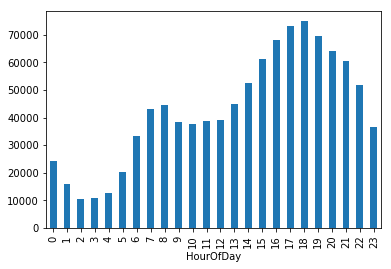

In [6]:
Hours = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
Hours/30
Hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

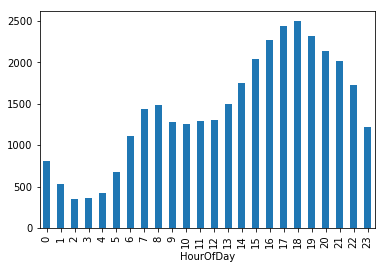

In [7]:
avgHours=Hours/30
avgHours.plot(kind='bar')

NameError: name 'plt' is not defined

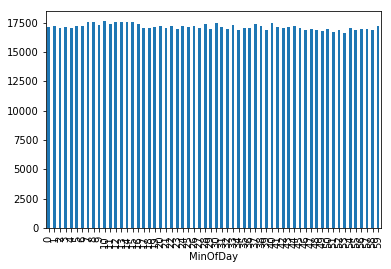

In [8]:
min = uber_data.pivot_table(index=['MinOfDay'],
                                  values='Base',
                                  aggfunc='count')
min.plot(kind='bar')
plt.ylim(16500,18000)



In [9]:
min.max()
#minute 10

17633

In [10]:
min.min()
#minute 53

16590

In [11]:
print(Hours)

HourOfDay
0     24133
1     16107
2     10702
3     10789
4     12675
5     20262
6     33307
7     43314
8     44477
9     38542
10    37634
11    38821
12    39193
13    45042
14    52643
15    61219
16    68224
17    73373
18    75040
19    69660
20    63988
21    60606
22    51817
23    36568
Name: Base, dtype: int64
